In [18]:
import readData as rd 
import mne 
from matplotlib import pyplot as plt 
import numpy as np

In [19]:
sid = '007'

In [20]:
raw, evts, eventsdict = rd.readBids(sid)
epochs = rd.get_epoched_Data(raw, evts, eventsdict)

Reading /home/jinaz/Desktop/EEG-semproject/bids/n170/sub-007/ses-N170/eeg/sub-007_ses-N170_task-N170_eeg.fdt
Reading events from bids/n170/sub-007/ses-N170/eeg/sub-007_ses-N170_task-N170_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> respo

/home/jinaz/Desktop/EEG-semproject/readData.py:32: RuntimeWarning: Data file name in EEG.data (sub-007_task-N170_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-007_ses-N170_task-N170_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renami

/home/jinaz/Desktop/EEG-semproject/readData.py:32: RuntimeWarning: Participants file not found for sub-007_ses-N170_task-N170_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 6759 samples (6.601 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


/home/jinaz/Desktop/EEG-semproject/ccs_eeg_semesterproject.py:102: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ica.ICA(method='imported_eeglab', n_components=n_components)
/home/jinaz/Desktop/EEG-semproject/ccs_eeg_semesterproject.py:71: UserWarning: loadtxt: Empty input file: "bids/n170/sub-007/ses-N170/eeg/sub-007_ses-N170_task-N170_badChannels.tsv"
  badChannels = np.loadtxt(fn + 'badChannels.tsv', delimiter='\t')


bids/n170/sub-007/ses-N170/eeg/sub-007_ses-N170_task-N170_
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 5 ICA components
    Projecting back using 30 PCA components


/home/jinaz/Desktop/EEG-semproject/readData.py:48: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads()


Used Annotations descriptions: ['response/201', 'response/202', 'stimulus/1', 'stimulus/10', 'stimulus/101', 'stimulus/102', 'stimulus/103', 'stimulus/104', 'stimulus/105', 'stimulus/106', 'stimulus/107', 'stimulus/108', 'stimulus/109', 'stimulus/11', 'stimulus/110', 'stimulus/111', 'stimulus/112', 'stimulus/113', 'stimulus/114', 'stimulus/115', 'stimulus/116', 'stimulus/117', 'stimulus/118', 'stimulus/119', 'stimulus/12', 'stimulus/120', 'stimulus/121', 'stimulus/122', 'stimulus/123', 'stimulus/124', 'stimulus/125', 'stimulus/126', 'stimulus/127', 'stimulus/128', 'stimulus/129', 'stimulus/13', 'stimulus/130', 'stimulus/131', 'stimulus/132', 'stimulus/133', 'stimulus/134', 'stimulus/135', 'stimulus/136', 'stimulus/137', 'stimulus/138', 'stimulus/139', 'stimulus/14', 'stimulus/140', 'stimulus/141', 'stimulus/142', 'stimulus/143', 'stimulus/144', 'stimulus/145', 'stimulus/146', 'stimulus/147', 'stimulus/148', 'stimulus/149', 'stimulus/15', 'stimulus/150', 'stimulus/151', 'stimulus/152', 

In [21]:
epochs_faces = epochs['faces']
epochs_cars = epochs['cars']

epochs_scrambled_faces = epochs['scrambled_faces']
epochs_scrambled_cars = epochs['scrambled_cars']

get power and induced for each condition. 2 average TFR per condition as result.

In [22]:
def generatePowerAndInduced(epochs):
    freqs = np.logspace(*np.log10([5, 80]), num=25)
    n_cycles = freqs/2  
    power_total = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)

    epochs_induced = epochs.copy()
    epochs_induced.subtract_evoked()

    power_induced = mne.time_frequency.tfr_morlet(epochs_induced, freqs=freqs, n_cycles=n_cycles, return_itc=False,n_jobs=4,average=True)

    return power_total, power_induced

In [23]:
power_total_faces, power_induced_faces = generatePowerAndInduced(epochs_faces)
power_total_cars, power_induced_cars = generatePowerAndInduced(epochs_cars)
power_total_scrambled_faces, power_induced_scrambled_faces = generatePowerAndInduced(epochs_scrambled_faces)
power_total_scrambled_cars, power_induced_scrambled_cars = generatePowerAndInduced(epochs_scrambled_cars)


Loading data for 80 events and 1230 original time points ...
46 bad epochs dropped


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.9s


Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Loading data for 34 events and 1230 original time points ...


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.9s


Loading data for 80 events and 1230 original time points ...
37 bad epochs dropped


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    3.1s


Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Loading data for 43 events and 1230 original time points ...


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    5.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.4s


Loading data for 80 events and 1230 original time points ...
34 bad epochs dropped


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.5s


Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Loading data for 46 events and 1230 original time points ...


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    5.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    3.2s


Loading data for 80 events and 1230 original time points ...
44 bad epochs dropped


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    6.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.3s


Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: VEOG_lower, HEOG_right, HEOG_left
[done]
Loading data for 36 events and 1230 original time points ...


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.4s finished


In [41]:
def pltEvoked(power_total, power_induced, vmin=-0.0000000035, vmean=0.0000000035):
    baseline = (None, 0)
    evoked = mne.combine_evoked([power_total, power_induced], [1,-1])
    vmin = vmin
    vmean = vmean
    power_total.plot(baseline=baseline, mode="mean", picks='PO8', vmin=vmin, vmax=-vmin, show=False)
    power_induced.plot(baseline=baseline, mode="mean", picks='PO8', vmin=vmin, vmax=-vmin, show=False)
    evoked.plot(baseline=baseline, mode="mean", picks='PO8', vmin=-vmean, vmax=vmean, show=False)

    return evoked 

In [43]:
power_face_car = mne.combine_evoked([power_total_faces, power_total_cars], weights=[1, -1])
power_face_car_induced = mne.combine_evoked([power_induced_faces, power_induced_cars], weights=[1, -1])

In [26]:
%matplotlib qt

No baseline correction applied


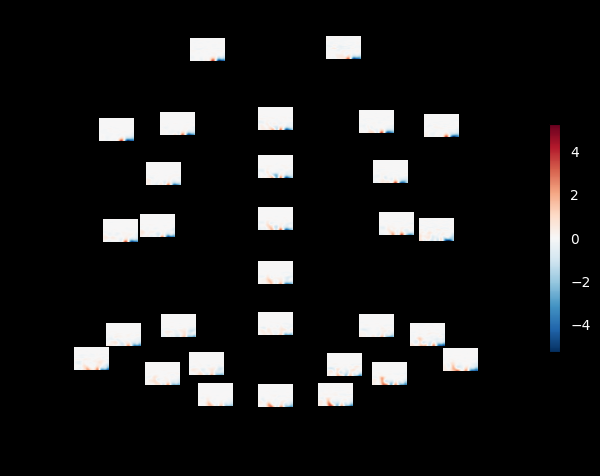

In [27]:
evoked.plot_topo()

In [28]:
%matplotlib inline

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


<AverageTFR | time : [-0.200195, 1.000000], freq : [5.000000, 80.000000], nave : 9, channels : 30, ~7.1 MB>

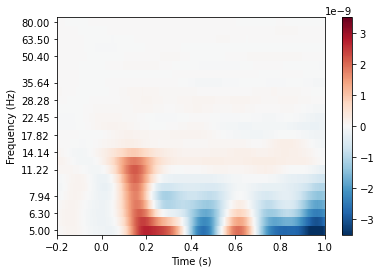

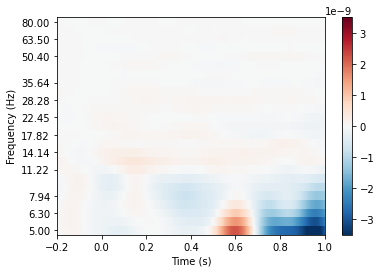

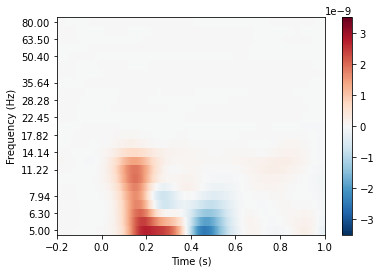

In [44]:
pltEvoked(power_face_car, power_face_car_induced)